<a href="https://colab.research.google.com/github/rahilshah17/Segmentation-module-for-autonomous-car/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MNIST dataset classification**

**Guide: Dr. Ramkrishna Pasumarthy**<br>
Task Assigned by: Soumyajit Chakraborty Sir<br>
Author: Rahil Amit Shah<br>
Roll no.: EE20B104


###**Importing the dataset and data vizualization**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = tf.data.Dataset.from_tensor_slices(x_train)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
x_test = tf.data.Dataset.from_tensor_slices(x_test)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

11490434/11490434 [==============================] - 0s 0us/step


Let's see how the dataset looks like.

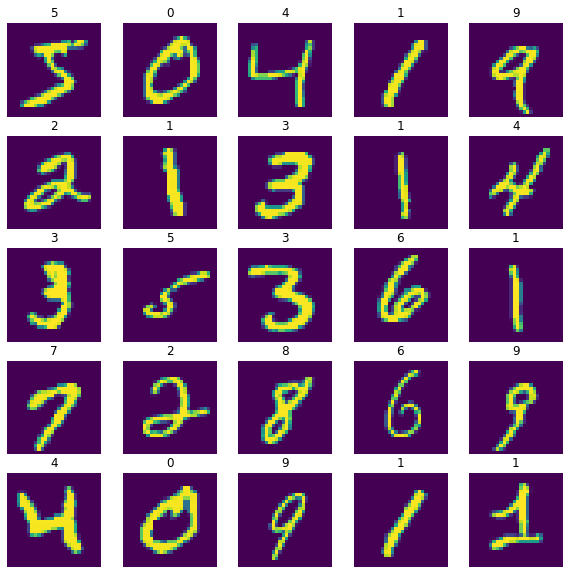

In [ ]:
images_iter = iter(x_train)
labels_iter = iter(y_train)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(next(images_iter).numpy().astype("uint8"))
    plt.title(next(labels_iter).numpy().astype("uint8"))
    plt.axis("off")

We see that the dataset consits of images of some handwritten numbers of low quality.

###**Training the model in tensorflow**

In [ ]:
def normalize(image):
    """
    Transform an image into a tensor of shape (64 * 64 * 3, )
    and normalize its components.

    Arguments
    image - Tensor.

    Returns:
    result -- Transformed tensor
    """
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [-1,])
    return image

In [ ]:
new_train = x_train.map(normalize)
new_test = x_test.map(normalize)

In [ ]:
print(next(iter(new_train)))

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):

    """
    Computes the sigmoid of z

    Arguments:
    z -- input value, scalar or vector

    Returns:
    a -- (tf.float32) the sigmoid of z
    """
    # tf.keras.activations.sigmoid requires float16, float32, float64, complex64, or complex128.

    # (approx. 2 lines)
    # z = ...
    # a = ...
    # YOUR CODE STARTS HERE
    z = tf.cast(z,tf.float32)
    a = tf.keras.activations.sigmoid(z)
    # YOUR CODE ENDS HERE
    return a

In [ ]:
# GRADED FUNCTION: one_hot_matrix
def one_hot_matrix(label, depth=10):
    """
    Computes the one hot encoding for a single label

    Arguments:
        label --  (int) Categorical labels
        depth --  (int) Number of different classes that label can take

    Returns:
         one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
    """
    # (approx. 1 line)
    # one_hot = None(None(None, None, None), shape=[-1, ])
    # YOUR CODE STARTS HERE
    one_hot = tf.reshape(tf.one_hot(label,depth,axis=0),[depth])

    # YOUR CODE ENDS HERE
    return one_hot

In [ ]:
new_y_test = y_test.map(one_hot_matrix)
new_y_train = y_train.map(one_hot_matrix)

In [ ]:
print(next(iter(new_y_train)))

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """


    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """

    initializer = tf.keras.initializers.GlorotNormal(seed=1)
    #(approx. 6 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # W3 = ...
    # b3 = ...
    # YOUR CODE STARTS HERE
    W1 = tf.Variable(initializer(shape = (500,784)))
    b1 = tf.Variable(initializer(shape = (500,1)))
    W2 = tf.Variable(initializer(shape = (250,500)))
    b2 = tf.Variable(initializer(shape = (250,1)))
    W3 = tf.Variable(initializer(shape = (100,250)))
    b3 = tf.Variable(initializer(shape = (100,1)))
    W4 = tf.Variable(initializer(shape = (10,100)))
    b4 = tf.Variable(initializer(shape = (10,1)))
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4
                  }

    return parameters

In [ ]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR

    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """

    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    #(approx. 5 lines)                   # Numpy Equivalents:
    # Z1 = ...                           # Z1 = np.dot(W1, X) + b1
    # A1 = ...                           # A1 = relu(Z1)
    # Z2 = ...                           # Z2 = np.dot(W2, A1) + b2
    # A2 = ...                           # A2 = relu(Z2)
    # Z3 = ...                           # Z3 = np.dot(W3, A2) + b3
    # YOUR CODE STARTS HERE
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.keras.activations.sigmoid(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.keras.activations.sigmoid(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    A3 = tf.keras.activations.sigmoid(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)
    # YOUR CODE ENDS HERE

    return Z4

In [ ]:
# GRADED FUNCTION: compute_total_loss

def compute_total_loss(logits, labels):
    """
    Computes the total loss

    Arguments:
    logits -- output of forward propagation (output of the last LINEAR unit), of shape (6, num_examples)
    labels -- "true" labels vector, same shape as Z3

    Returns:
    total_loss - Tensor of the total loss value
    """

    #(1 line of code)
    # total_loss = ...
    # YOUR CODE STARTS HERE

    total_loss = tf.reduce_sum(tf.keras.losses.categorical_crossentropy(tf.transpose(labels),tf.transpose(logits),from_logits=True))
    # YOUR CODE ENDS HERE
    return total_loss

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.01,
          num_epochs = 1500, minibatch_size = 16, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.

    Arguments:
    X_train -- training set, of shape (input size = 784, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 10, number of training examples = 1080)
    X_test -- training set, of shape (input size = 784, number of training examples = 120)
    Y_test -- test set, of shape (output size = 10, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 10 epochs

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []                                        # To keep track of the cost
    train_acc = []
    test_acc = []

    # Initialize your parameters
    #(1 line)
    parameters = initialize_parameters()

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    # The CategoricalAccuracy will track the accuracy for this multiclass problem
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()

    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))

    # We can get the number of elements of a dataset using the cardinality method
    m = dataset.cardinality().numpy()

    minibatches = dataset.batch(minibatch_size).prefetch(8)
    test_minibatches = test_dataset.batch(minibatch_size).prefetch(8)
    #X_train = X_train.batch(minibatch_size, drop_remainder=True).prefetch(8)# <<< extra step
    #Y_train = Y_train.batch(minibatch_size, drop_remainder=True).prefetch(8) # loads memory faster

    # Do the training loop
    for epoch in range(num_epochs):

        epoch_total_loss = 0.

        #We need to reset object to start measuring from 0 the accuracy each epoch
        train_accuracy.reset_states()

        for (minibatch_X, minibatch_Y) in minibatches:

            with tf.GradientTape() as tape:
                # 1. predict
                Z4 = forward_propagation(tf.transpose(minibatch_X), parameters)

                # 2. loss
                minibatch_total_loss = compute_total_loss(Z4, tf.transpose(minibatch_Y))

            # We accumulate the accuracy of all the batches
            train_accuracy.update_state(minibatch_Y, tf.transpose(Z4))

            trainable_variables = [W1, b1, W2, b2, W3, b3,W4,b4]
            grads = tape.gradient(minibatch_total_loss, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_total_loss += minibatch_total_loss

        # We divide the epoch total loss over the number of samples
        epoch_total_loss /= m

        # Print the cost every 10 epochs
        if print_cost == True and epoch % 2 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_total_loss))
            print("Train accuracy:", train_accuracy.result())

            # We evaluate the test set every 10 epochs to avoid computational overhead
            for (minibatch_X, minibatch_Y) in test_minibatches:
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                test_accuracy.update_state(minibatch_Y, tf.transpose(Z4))
            print("Test_accuracy:", test_accuracy.result())

            costs.append(epoch_total_loss)
            train_acc.append(train_accuracy.result())
            test_acc.append(test_accuracy.result())
            test_accuracy.reset_states()


    return parameters, costs, train_acc, test_acc

In [ ]:
parameters, costs, train_acc, test_acc = model(new_train, new_y_train, new_test, new_y_test, num_epochs=10)

Cost after epoch 0: 0.293450
Train accuracy: tf.Tensor(0.91213334, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.1096, shape=(), dtype=float32)
Cost after epoch 2: 0.171196
Train accuracy: tf.Tensor(0.95021665, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.1096, shape=(), dtype=float32)
Cost after epoch 4: 0.174994
Train accuracy: tf.Tensor(0.95015, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.1096, shape=(), dtype=float32)
Cost after epoch 6: 0.176096
Train accuracy: tf.Tensor(0.9508, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.1096, shape=(), dtype=float32)
Cost after epoch 8: 0.172700
Train accuracy: tf.Tensor(0.95138335, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.1096, shape=(), dtype=float32)


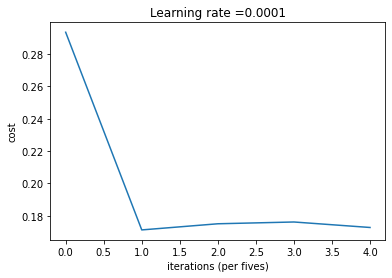

In [ ]:
# Plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()


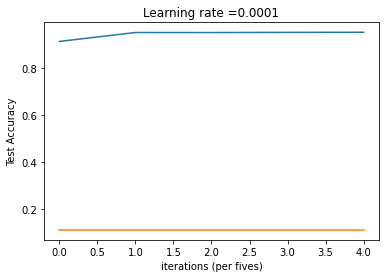

In [ ]:
# Plot the train accuracy
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()


In [ ]:
x